In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import h5py
import time_conversion as tiempo


#Parámetros cosmológicos
#--------------------------------------------------------------------------
h=0.732
G = 4.299e-6
a0=1.
H0 = h*100
omega_lambda=0.716
omega_matter=0.1277/(h**2.)
omega0 = omega_lambda + omega_matter
#---------------------------------------------------------------------------

aa = np.loadtxt('/home/ornela/SimCLUES/redshift_outputs.txt')
aexp = aa[:,2]


snapshot=range(496,60,-1) #SNAPSHOTS

for isnap in snapshot:
    
    snap = h5py.File('/home/ornela/SimCLUES/outputs_1/snap_'+str('%03d'%isnap)+'.h5py', 'r')
    
    cm   = snap['subhalo_000/Center'].value
    r200 = snap['subhalo_000/R200'].value
    pstr = snap['subhalo_000/Str/Coordinates'].value
    mstr = snap['subhalo_000/Str/Masses'].value
  
    z     = a0/aexp[isnap] - 1.
    Ht    = H0*np.sqrt(omega_lambda+(1-omega0)*(1+z)**2+omega_matter*(1+z)**3)
    time  = tiempo.conv(z, h, omega_lambda, omega_matter)
    
    #paso las coordenadas al centro de la galaxia y paso a coordenadas físicas
    xstr = (pstr[:,0]-cm[0])*aexp[isnap]/h
    ystr = (pstr[:,1]-cm[1])*aexp[isnap]/h
    zstr = (pstr[:,2]-cm[2])*aexp[isnap]/h
    r    = np.sqrt(xstr**2+ystr**2+zstr**2)
    
    mstr = mstr/h    

    r200 = r200*aexp[isnap]/h #radio virial a unidades fisicas

    rgal = 0.15*r200          #defino el radio de la galaxia

    limit = np.where(r<rgal)         #hago un límite de los r dentro de rgal
    r_sort = np.sort(r[limit])       #acomodo los r de menor a mayor
    r_indice = np.argsort(r[limit])  #saco los argumentos de r acomodados de menor a mayor

    Mc_str = cumsum(mstr[limit][r_indice])  #masa acumulada en cada radio dentro de rgal
    Mgal = Mc_str[-1]  #masa total de la galaxia

#Calculo de los radios a 50% y 90% la masa de la galaxia
#-----------------------------------------------------------------------
    razon = Mc_str/Mgal 
    noventa, = np.where(razon < 0.9)
    cincuenta, = np.where(razon < 0.5)
    
    r90 = r_sort[noventa][-1]   #radio a 90% la masa
    r50 = r_sort[cincuenta][-1] #radio a 50% la masa
    
    
    dd = range(496,300,-1)
    dd.remove(428)
    if isnap in dd:
        raux = 2*r50
    elif (isnap == 428) or ((isnap < 301) & (isnap > 283)):
        raux = r50
    elif (isnap > 271) & (isnap < 284):
        raux = 0.75
    elif isnap < 272:
        raux = 0.5
    
    archivo1 =  open('/home/ornela/PYTHON/Barras_GdGs/Barras_Gd/_data/M31_test.dat','a')
    archivo1.write(str('%12.6f'% time) +'\t'+
                 str('%12.6f'% raux) +'\n')
    archivo1.close()


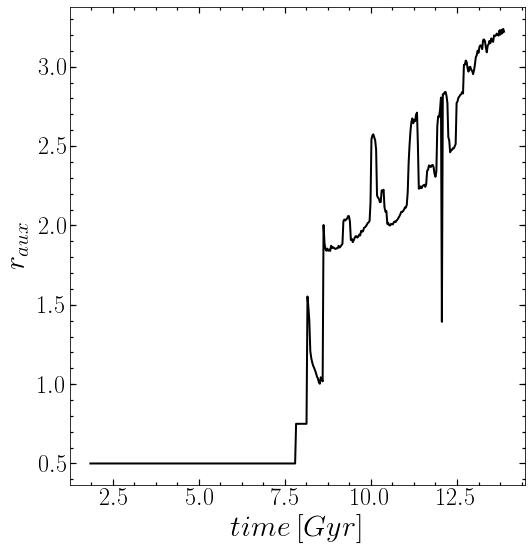

In [4]:
data = np.loadtxt('/home/ornela/PYTHON/Barras_GdGs/Barras_Gd/_data/M31_test.dat')
time = data[:,0]
raux = data[:,1]


from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95)
ax1=fig.add_subplot(111)
ax1.plot(time,raux,'k', lw=2)
# ax1.set_ylim(9,11.1)
# ax1.set_xlim(10,12.5)
ax1.minorticks_on()
ax1.tick_params( labelsize=24)
ax1.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')#,colors='w')
ax1.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on')#,colors='w')  
ax1.set_xlabel(r'$time\:[Gyr]$', fontsize=30)
ax1.set_ylabel(r'$r_{aux}$', fontsize=30)
plt.show()

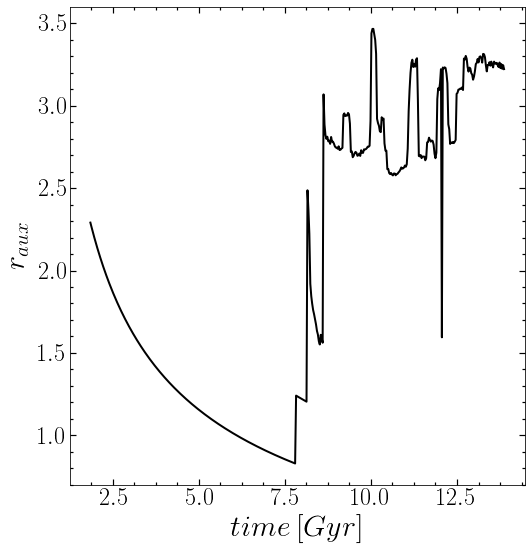

In [5]:
aa = np.loadtxt('/home/ornela/SimCLUES/redshift_outputs.txt')
aexp = aa[61:,2]
aexp = aexp[::-1]

data = np.loadtxt('/home/ornela/PYTHON/Barras_GdGs/Barras_Gd/_data/M31_test.dat')
time = data[:,0]
raux = data[:,1]

rr= raux/aexp
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95)
ax1=fig.add_subplot(111)
ax1.plot(time,rr,'k', lw=2)
# ax1.set_ylim(9,11.1)
# ax1.set_xlim(10,12.5)
ax1.minorticks_on()
ax1.tick_params( labelsize=24)
ax1.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')#,colors='w')
ax1.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on')#,colors='w')  
ax1.set_xlabel(r'$time\:[Gyr]$', fontsize=30)
ax1.set_ylabel(r'$r_{aux}$', fontsize=30)
plt.show()

# For GASOLINE

In [8]:
import h5py

#Parámetros cosmológicos
#--------------------------------------------------------------------------
G = 4.299e-6
a0=1.
#---------------------------------------------------------------------------

snapshot = np.loadtxt('/home/ornela/SimCLUES/Gasoline/snapshots.txt', dtype='string') #SNAPSHOTS
snapshot = snapshot[::-1]

for j in range(0,len(snapshot)-1):
    
    snap = h5py.File('/home/ornela/SimCLUES/Gasoline/outputs2/snap_'+str('%s'%snapshot[j])+'.h5py', 'r')
    
    cm   = snap['subhalo_001/Center'].value
    r200 = snap['subhalo_001/R200'].value
    time = snap['subhalo_001/Time'].value
    h    = snap['subhalo_001/h'].value
    aexp = snap['subhalo_001/aexp'].value
    
    pstr = snap['subhalo_001/Str/Coordinates'].value
    mstr = snap['subhalo_001/Str/Masses'].value

#paso las coordenadas al centro de la galaxia
    xstr = (pstr[:,0]-cm[0])
    ystr = (pstr[:,1]-cm[1])
    zstr = (pstr[:,2]-cm[2])
    r    = np.sqrt(xstr**2+ystr**2+zstr**2)
#----------------------------------------------------------------------
    
    rgal = 0.15*r200          #defino el radio de la galaxia

    limit = np.where(r<rgal)         #hago un límite de los r dentro de rgal
    r_sort = np.sort(r[limit])       #acomodo los r de menor a mayor
    r_indice = np.argsort(r[limit])  #saco los argumentos de r acomodados de menor a mayor

    Mc_str = cumsum(mstr[limit][r_indice])  #masa acumulada en cada radio dentro de rgal
    Mgal = Mc_str[-1]  #masa total de la galaxia

#Calculo de los radios a 50% y 90% la masa de la galaxia
#-----------------------------------------------------------------------
    razon = Mc_str/Mgal 
    noventa, = np.where(razon < 0.9)
    cincuenta, = np.where(razon < 0.5)

    r90 = r_sort[noventa][-1]   #radio a 90% la masa
    r50 = r_sort[cincuenta][-1] #radio a 50% la masa
    
#-----------------------------------------------------------------------
    dd = range(0,25)+range(38,51)
    ss = range(25,31)+range(32,38)+range(51,len(snapshot)-1)
    if j in dd:
        raux = 2*r50
    elif j in ss:
        raux = r50
    elif j == 31:
        raux = 0.75
        
    archivo1 =  open('/home/ornela/PYTHON/Barras_GdGs/Barras_Gs/_data/M31_test.dat','a')
    archivo1.write(str('%12.6f'% time) +'\t'+
                 str('%12.6f'% raux) +'\t'+
                 str('%12.6f'% aexp) +'\n' )
    archivo1.close()


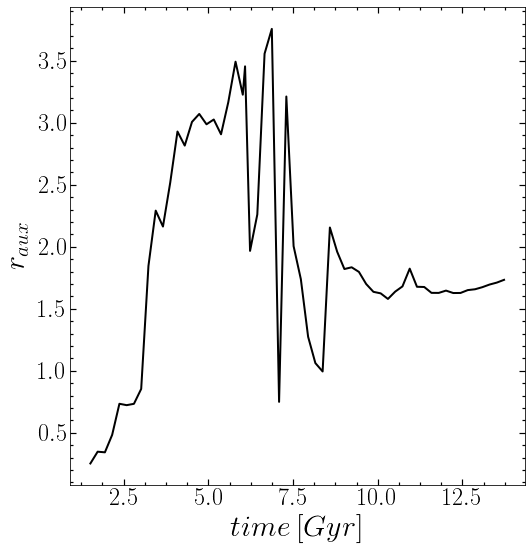

In [9]:
data = np.loadtxt('/home/ornela/PYTHON/Barras_GdGs/Barras_Gs/_data/M31_test.dat')
time = data[:,0]
raux = data[:,1]


from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95)
ax1=fig.add_subplot(111)
ax1.plot(time,raux,'k', lw=2)
# ax1.set_ylim(9,11.1)
# ax1.set_xlim(10,12.5)
ax1.minorticks_on()
ax1.tick_params( labelsize=24)
ax1.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')#,colors='w')
ax1.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on')#,colors='w')  
ax1.set_xlabel(r'$time\:[Gyr]$', fontsize=30)
ax1.set_ylabel(r'$r_{aux}$', fontsize=30)
plt.show()

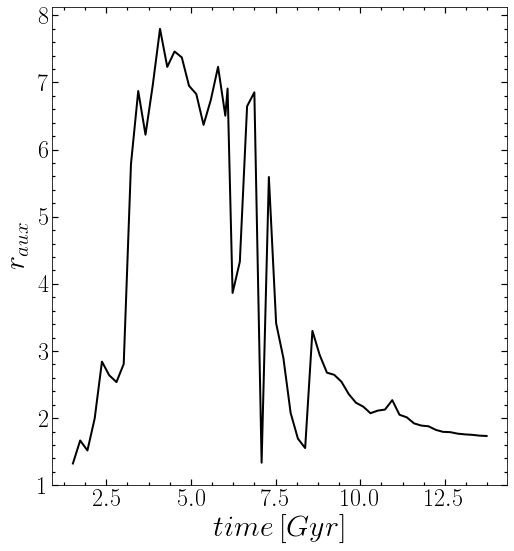

In [11]:
data = np.loadtxt('/home/ornela/PYTHON/Barras_GdGs/Barras_Gs/_data/M31_test.dat')
time = data[:,0]
raux = data[:,1]
aexp = data[:,2]

rr= raux/aexp
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95)
ax1=fig.add_subplot(111)
ax1.plot(time,rr,'k', lw=2)
# ax1.set_ylim(9,11.1)
# ax1.set_xlim(10,12.5)
ax1.minorticks_on()
ax1.tick_params( labelsize=24)
ax1.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')#,colors='w')
ax1.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on')#,colors='w')  
ax1.set_xlabel(r'$time\:[Gyr]$', fontsize=30)
ax1.set_ylabel(r'$r_{aux}$', fontsize=30)
plt.show()

In [12]:
import h5py

#Parámetros cosmológicos
#--------------------------------------------------------------------------
G = 4.299e-6
a0=1.
#---------------------------------------------------------------------------

snapshot = np.loadtxt('/home/ornela/SimCLUES/Gasoline/snapshots.txt', dtype='string') #SNAPSHOTS
snapshot = snapshot[::-1]

for j in range(0,len(snapshot)-1):
    
    snap = h5py.File('/home/ornela/SimCLUES/Gasoline/outputs2/snap_'+str('%s'%snapshot[j])+'.h5py', 'r')
    
    cm   = snap['subhalo_002/Center'].value
    r200 = snap['subhalo_002/R200'].value
    time = snap['subhalo_002/Time'].value
    h    = snap['subhalo_002/h'].value
    aexp = snap['subhalo_002/aexp'].value
    
    pstr = snap['subhalo_002/Str/Coordinates'].value
    mstr = snap['subhalo_002/Str/Masses'].value

#paso las coordenadas al centro de la galaxia
    xstr = (pstr[:,0]-cm[0])
    ystr = (pstr[:,1]-cm[1])
    zstr = (pstr[:,2]-cm[2])
    r    = np.sqrt(xstr**2+ystr**2+zstr**2)
#----------------------------------------------------------------------
    
    rgal = 0.15*r200          #defino el radio de la galaxia

    limit = np.where(r<rgal)         #hago un límite de los r dentro de rgal
    r_sort = np.sort(r[limit])       #acomodo los r de menor a mayor
    r_indice = np.argsort(r[limit])  #saco los argumentos de r acomodados de menor a mayor

    Mc_str = cumsum(mstr[limit][r_indice])  #masa acumulada en cada radio dentro de rgal
    Mgal = Mc_str[-1]  #masa total de la galaxia

#Calculo de los radios a 50% y 90% la masa de la galaxia
#-----------------------------------------------------------------------
    razon = Mc_str/Mgal 
    noventa, = np.where(razon < 0.9)
    cincuenta, = np.where(razon < 0.5)

    r90 = r_sort[noventa][-1]   #radio a 90% la masa
    r50 = r_sort[cincuenta][-1] #radio a 50% la masa
    
#-----------------------------------------------------------------------
    dd = range(0,3)
    ss = range(3,18)
    qq = range(18,len(snapshot)-1)
    if j in dd:
        raux = r50
    elif j in ss:
        raux = 0.5*r50
    elif j in qq:
        raux = 0.75
        
    archivo1 =  open('/home/ornela/PYTHON/Barras_GdGs/Barras_Gs/_data/MW_test.dat','a')
    archivo1.write(str('%12.6f'% time) +'\t'+
                 str('%12.6f'% raux) +'\t'+
                 str('%12.6f'% aexp) +'\n' )
    archivo1.close()

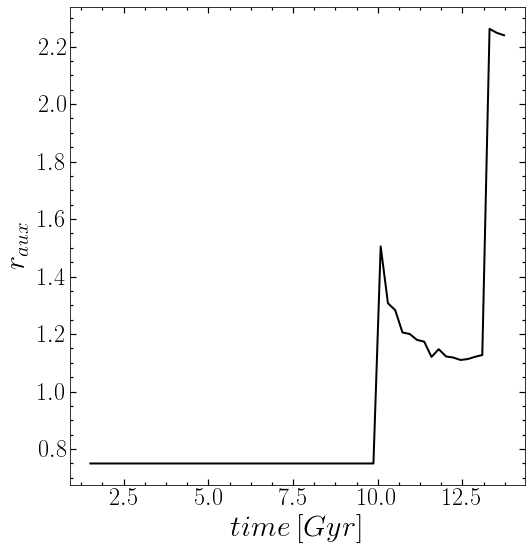

In [13]:
data = np.loadtxt('/home/ornela/PYTHON/Barras_GdGs/Barras_Gs/_data/MW_test.dat')
time = data[:,0]
raux = data[:,1]


from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95)
ax1=fig.add_subplot(111)
ax1.plot(time,raux,'k', lw=2)
# ax1.set_ylim(9,11.1)
# ax1.set_xlim(10,12.5)
ax1.minorticks_on()
ax1.tick_params( labelsize=24)
ax1.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')#,colors='w')
ax1.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on')#,colors='w')  
ax1.set_xlabel(r'$time\:[Gyr]$', fontsize=30)
ax1.set_ylabel(r'$r_{aux}$', fontsize=30)
plt.show()

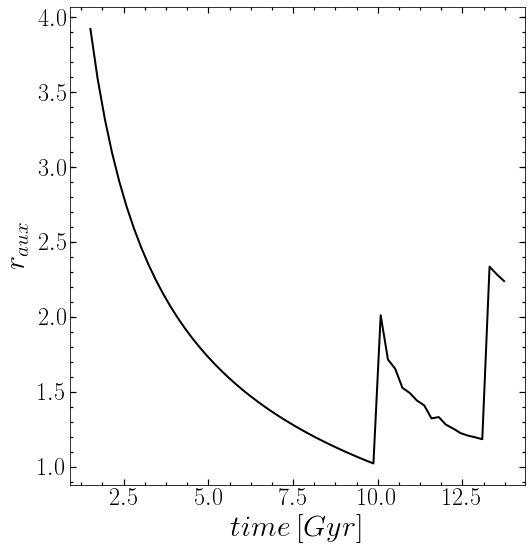

In [14]:
data = np.loadtxt('/home/ornela/PYTHON/Barras_GdGs/Barras_Gs/_data/MW_test.dat')
time = data[:,0]
raux = data[:,1]
aexp = data[:,2]

rr= raux/aexp
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95)
ax1=fig.add_subplot(111)
ax1.plot(time,rr,'k', lw=2)
# ax1.set_ylim(9,11.1)
# ax1.set_xlim(10,12.5)
ax1.minorticks_on()
ax1.tick_params( labelsize=24)
ax1.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')#,colors='w')
ax1.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on')#,colors='w')  
ax1.set_xlabel(r'$time\:[Gyr]$', fontsize=30)
ax1.set_ylabel(r'$r_{aux}$', fontsize=30)
plt.show()